In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pyfolio as pf
import pandas as pd
import numpy as np
from yahoo_finance import Share
import matplotlib
import datetime
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [5]:
def get_dailyret(ser):
    return (ser.shift(-1) - ser)/ser

In [6]:
def get_smooth_val(ser, lookback):
    ###does not include today so that residual is relevant for return
    ls = []
    bs = []
    lr = LinearRegression()
    for i in range(len(ser)):
        a = ser[i-lookback:i].tolist()
        #print(a)
        if len(a) == 0:
            ls.append(np.nan)
            bs.append(np.nan)
        else:
            a = lr.fit(np.array(range(lookback)).reshape(lookback,1),np.array(a).reshape((lookback,1)))
            ls.append(float(a.predict(lookback)[0]))
            bs.append(float(a.coef_))
    return ls, bs

In [37]:
def get_stratret(row, threshold=11):
    if row['resid']>row['residvar']*threshold:
        return -row['dailyrets']
    elif row['resid']<-row['residvar']*threshold:
        return row['dailyrets']
    else:
        return 0

In [8]:
def get_dfs(strat):
    data = pd.DataFrame(Share(strat).get_historical('2010-05-02', '2015-12-12'))
    print('fetched data')
    data.Date = [datetime.strptime(data.Date.iloc[i], '%Y-%m-%d') for i in data.index]
    data.index = data.Date
    data = data.iloc[::-1]
    data.Close = [float(x) for x in data.Close]
    data['smooth'], data['trend'] = get_smooth_val(data.Close, 50)
    data['resid'] = data.Close-data['smooth']
    data['dailyrets'] = get_dailyret(data.Close)
    return data
    #thresh = 1.5*np.std(data['resid'])
    #data['stratret'] = data.apply(get_stratret,args = (thresh,), axis = 1)
    #eqcurve = np.cumprod(3*data.stratret+1)
    #plot(eqcurve)
    #show()
    #return eqcurve[-2]

In [ ]:
tickdict = {}
numstrats = 0
for ticker in sdf:
    print(numstrats)
    print(ticker)
    try:
        tickdict[ticker] = get_dfs(ticker)
        #rets.append(main(ticker))
        numstrats+=1
        #print(rets[-1])
    except:
        print('failed')

0
T
fetched data
1
CTL
fetched data
2
FTR
fetched data
3
LVLT
fetched data
4
VZ
fetched data
5
AAP
fetched data
6
AMZN
fetched data
7
AN
fetched data
8
AZO
fetched data
9
BBBY
fetched data
10
BBY
fetched data
11
BWA
fetched data
12
CVC
fetched data
13
KMX
fetched data
14
CCL
fetched data
15
CBS
fetched data
16
CMG
fetched data
17
COH
fetched data
18

In [44]:
######USE OTHER ONE##########
def sweetspot(ticker):
    cs=[]
    eqs=[]
    data = tickdict[ticker]
    data['residvar'] = [np.std(data.resid.iloc[i-100:i]) for i in range(len(data))]
    for x in range(200):
        c = .01*x
        #thresh = c*np.std(data['resid'])
        data['stratret'] = data.apply(get_stratret,args = (c,), axis = 1)
        eqcurve = np.cumprod(3*data.stratret+1)
        cs.append(c)
        eqs.append(eqcurve[-250])
    plot(cs,eqs)
    show()

In [59]:
def sweetspotuser(ticker):
    cs=[]
    eqs=[]
    data = tickdict[ticker]
    data['residvar'] = [np.std(data.resid.iloc[i-100:i]) for i in range(len(data))]
    for x in range(200):
        c = .01*x
        #thresh = c*np.std(data['resid'])
        data['stratret'] = data.apply(get_stratret,args = (c,), axis = 1)
        eqcurve = np.cumprod(3*data.stratret+1)
        cs.append(c)
        eqs.append(eqcurve[-250])
    #plot(cs,eqs)
    #show()
    data  = tickdict[ticker].tail(250)
    c = cs[argmax(eqs)]
    data['stratret'] = data.apply(get_stratret,args = (c,), axis = 1)
    eqcurve = np.cumprod(3*data.stratret+1)
    return(eqcurve[-2])

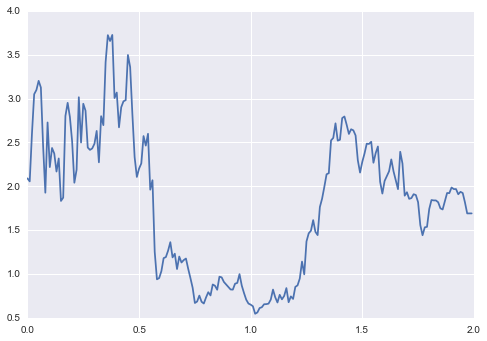

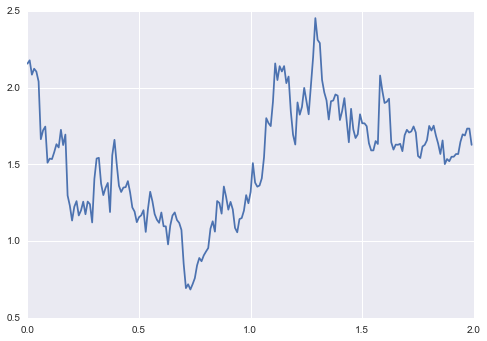

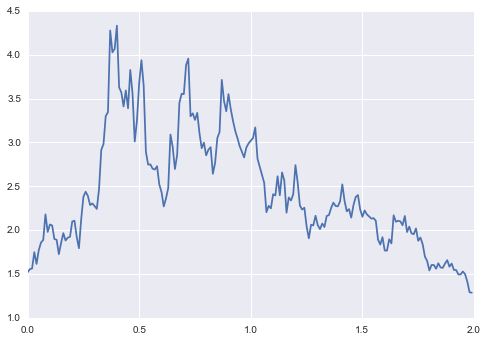

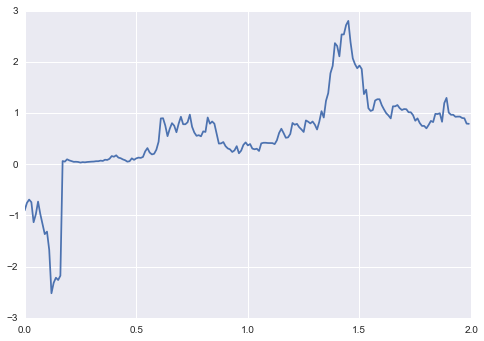

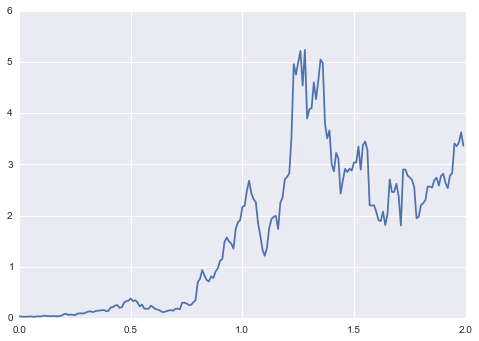

In [41]:
portf = []
for key in tickdict:
    r = sweetspotuser(key)
    print(r)
    portf.append(r)
    print(np.mean(portf))

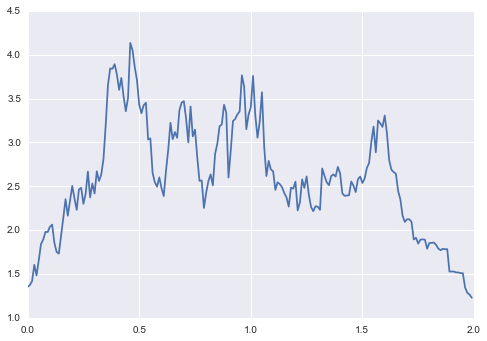

In [22]:
plot(cs,eqs)

fetched data


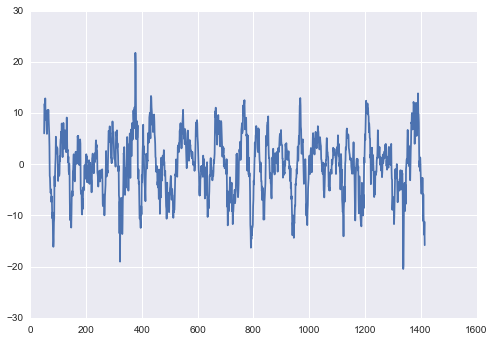

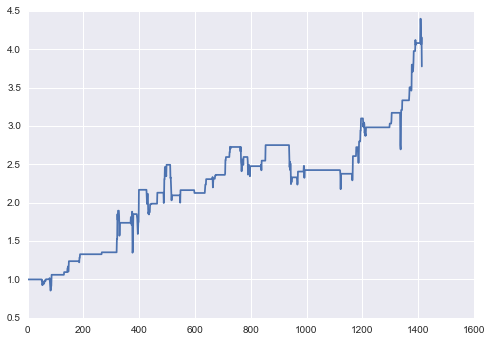

3.7763537720594123

In [7]:
main('GS')

In [9]:
import get_symbols

In [12]:
sdf = get_symbols.main()

/Users/liamconnell/anaconda/lib/python3.4/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


0
nan
MMM
fetched data


/Users/liamconnell/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


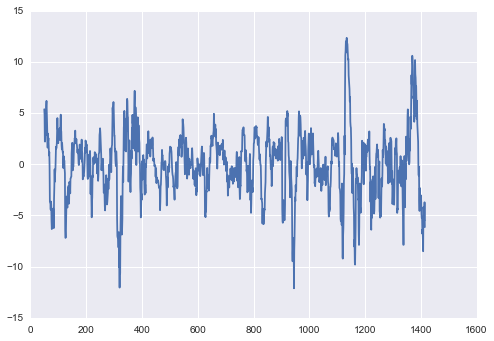

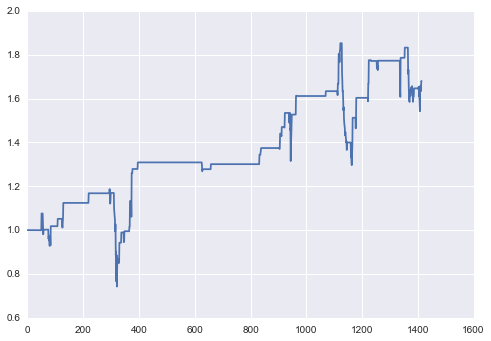

1.68017937688
1
1.68017937688
ADT
fetched data


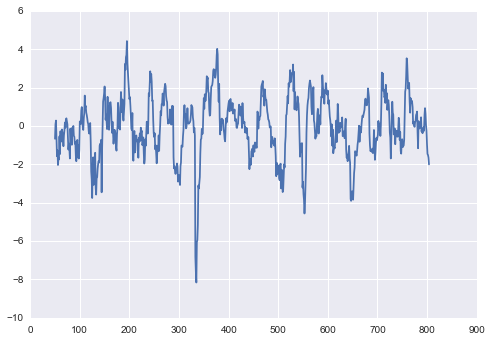

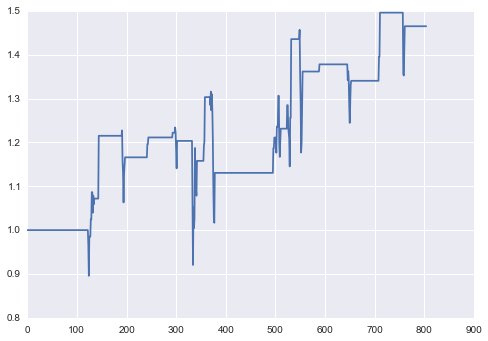

1.46499965816
2
1.57258951752
ALLE
fetched data


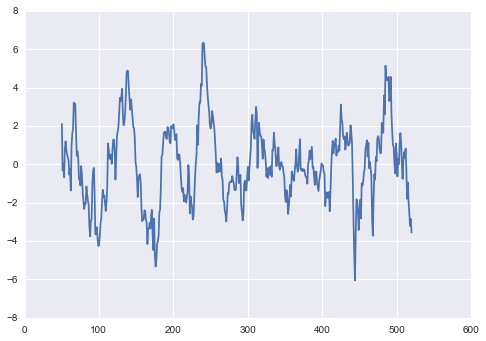

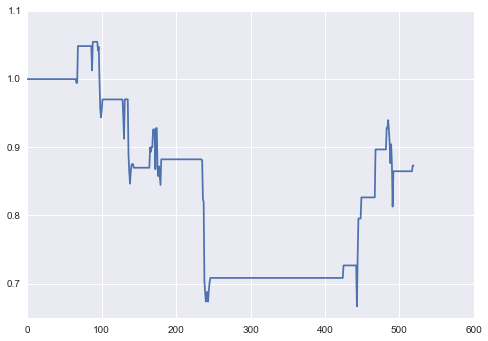

In [ ]:
rets = []
numstrats = 0
for ticker in sdf:
    #print(rets[-1])
    print(numstrats)
    print(np.mean(rets))
    print(ticker)
    try:
        rets.append(main(ticker))
        numstrats+=1
        print(rets[-1])
    except:
        print('failed')

In [125]:
lr.fit(np.array(range(5)).reshape(5,1),z.reshape((5,1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
float(lr.coef_)

-2.0149980000000003

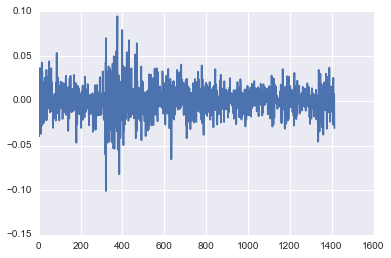

In [66]:
plot(get_dailyret(gs.Close))

In [58]:
float(gs.Close[0])

149.5

In [95]:
gs.Close.head(6)

Date
2010-05-03    149.500000
2010-05-04    149.449997
2010-05-05    148.190002
2010-05-06    142.320007
2010-05-07    142.990005
2010-05-10    143.830002
Name: Close, dtype: float64

In [1]:
from urllib.request import Request
from urllib.request import urlopen
import pytz
import pandas as pd

from bs4 import BeautifulSoup
from datetime import datetime
from pandas.io.data import DataReader

In [2]:
SITE = "http://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [3]:
def scrape_list(site):
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(site, headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page)

    table = soup.find('table', {'class': 'wikitable sortable'})
    sector_tickers = dict()
    for row in table.findAll('tr'):
        col = row.findAll('td')
        if len(col) > 0:
            sector = str(col[3].string.strip()).lower().replace(' ', '_')
            ticker = str(col[0].string.strip())
            if sector not in sector_tickers:
                sector_tickers[sector] = list()
            sector_tickers[sector].append(ticker)
    return sector_tickers


In [4]:
ls = scrape_list(SITE)

/Users/liamconnell/anaconda/lib/python3.4/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
sdf = []
for key in ls:
    for k in ls[key]:
        sdf.append(k)
    #print(ls[key])
sdf

['MMM',
 'ADT',
 'ALLE',
 'AAL',
 'AME',
 'APH',
 'BA',
 'CHRW',
 'CAT',
 'CTAS',
 'GLW',
 'CSX',
 'CMI',
 'DHR',
 'DE',
 'DAL',
 'DOV',
 'DNB',
 'ETN',
 'EMR',
 'EXPD',
 'FAST',
 'FDX',
 'FLIR',
 'FLS',
 'FLR',
 'GD',
 'GE',
 'GWW',
 'HON',
 'ITW',
 'IR',
 'IRM',
 'JEC',
 'JBHT',
 'KSU',
 'LLL',
 'LEG',
 'LMT',
 'MAS',
 'NLSN',
 'NSC',
 'NOC',
 'PCAR',
 'PH',
 'PNR',
 'PBI',
 'PCP',
 'PWR',
 'RTN',
 'RSG',
 'RHI',
 'ROK',
 'COL',
 'ROP',
 'R',
 'LUV',
 'SRCL',
 'TXT',
 'TYC',
 'UNP',
 'UAL',
 'UPS',
 'URI',
 'UTX',
 'VRSK',
 'WM',
 'XYL',
 'ACN',
 'ATVI',
 'ADBE',
 'AKAM',
 'ADS',
 'GOOGL',
 'GOOG',
 'ALTR',
 'ADI',
 'AAPL',
 'AMAT',
 'ADSK',
 'ADP',
 'AVGO',
 'BRCM',
 'CA',
 'CSCO',
 'CTXS',
 'CTSH',
 'CSRA',
 'EBAY',
 'EA',
 'EMC',
 'EQIX',
 'FFIV',
 'FB',
 'FIS',
 'FSLR',
 'FISV',
 'HRS',
 'HPE',
 'HPQ',
 'INTC',
 'IBM',
 'INTU',
 'JNPR',
 'KLAC',
 'LRCX',
 'LLTC',
 'MA',
 'MCHP',
 'MU',
 'MSFT',
 'MSI',
 'NTAP',
 'NFLX',
 'NVDA',
 'ORCL',
 'PAYX',
 'PYPL',
 'QRVO',
 'QCOM',
 'RHT'